### Task 1

##### This program takes a positive floating-point number as input and outputs an approximation of its square root.

In [ ]:
def sqrt(number):
    a = float(number) # number to get square root of
    diff = 99999999   # set a big number as difference
    while diff > 0.05: # iterate until difference between original number and squrare of guessed number is less than 0.05
        number = 0.5 * (number + a / number) # update using newtowns method x_(n+1) = 0.5 * (x_n +a / x_n)
        diff = abs(number**2-a)
    return number

num = float(input("Please enter a positive number:"))
sqroot = sqrt(num)
print("The square root of {} is approx. {:.1f}".format(num, sqroot))

***

### Task 2

### chi-squared test

In [25]:
# Import pandas
import pandas as pd

# Import scipy
import scipy.stats as ss

In [32]:
# Create the data frame.
df = pd.DataFrame({'drink': drink, 'biscuit': biscuit})

# Show.
df

,drink,biscuit
0,Coffee,Chocolate
1,Coffee,Chocolate
2,Coffee,Chocolate
3,Coffee,Chocolate
4,Coffee,Chocolate
...,...,...
196,Tea,Plain
197,Tea,Plain
198,Tea,Plain
199,Tea,Plain


### Contingency Table

In [33]:
# Perform Crosstabs Contingency.
cross = ss.contingency.crosstab(df['drink'], df['biscuit'])

# Show.
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [14]:
# The first variable values, and the second.
first, second = cross.elements

# Show.
first, second

(array(['Coffee', 'Tea'], dtype=object),
 array(['Chocolate', 'Plain'], dtype=object))

In [15]:
# The counts.
cross.count

array([[43, 57],
       [56, 45]])

### Statistical Test

In [16]:
# Do the statistics. Just do them.
result = ss.chi2_contingency(cross.count, correction=False)

# Show.
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [17]:
# The expected fequencies if independent.
result.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

### Result

In [18]:
# The chi-square test of independence shows that there is no significant 
# association between drink preference and biscuit preference, X2 (1, N = 201) = 3.1, p = 0.07.

***

### Task 3

### t-Test

In [17]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

In [8]:

# Download the penguins data set from GitHub
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [14]:
# Get the body mass for female gentoo
female_gentoo = df.loc[(df["species"] == "Gentoo") & (df["sex"] == "FEMALE")]['body_mass_g'].to_numpy()
female_gentoo

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

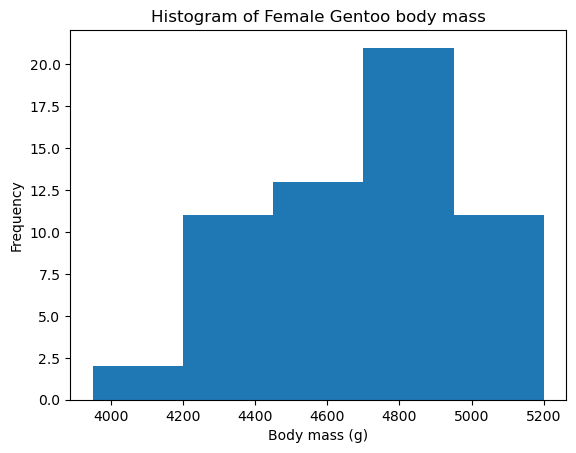

In [42]:
# Create a histogram for female body mass
plt.hist(female_gentoo, bins=5)

# Add labels and title
plt.xlabel('Body mass (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Female Gentoo body mass')

# Show the histogram
plt.show()

In [15]:
# Get the body mass for male gentoo
male_gentoo = df.loc[(df["species"] == "Gentoo") & (df["sex"] == "MALE")]['body_mass_g'].to_numpy()
male_gentoo

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

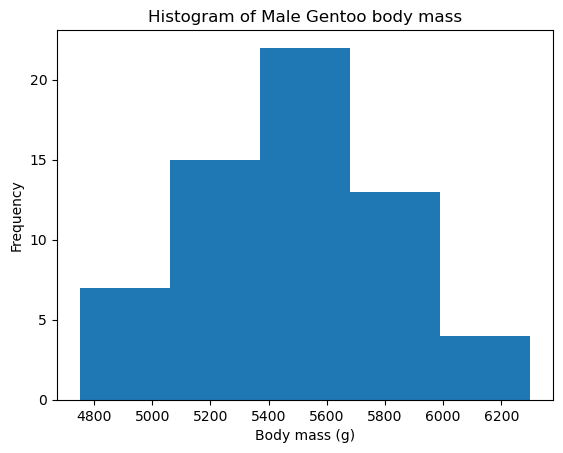

In [43]:
# Create a histogram for male body mass
plt.hist(male_gentoo, bins=5)

# Add labels and title
plt.xlabel('Body mass (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Male Gentoo body mass')

# Show the histogram
plt.show()

### Running t-test

In [18]:
# t-test.
ss.ttest_ind(female_gentoo, male_gentoo)

Ttest_indResult(statistic=-14.721676481405709, pvalue=2.133687602018886e-28)

In [41]:
# t-statistics indicate that mean body mass of female gentoo penguins is lower than 
# the mean body mass of male gentoo penguins. 
# The magnitude (14) indicate that the diffence is substantial. 
# Because of the high p-value, the null hypotheis can be rejected 
# (i.e there is no significant difference between the two groups),
# which means that there is a significant difference in the body mass between male 
# and female gentoo penguins.

***

## Task 4. Iris dataset

In [12]:
# Data frames.
import pandas as pd

# Machine Learning.
import sklearn as sk

#Plottinh
import seaborn as sns

In [13]:
# Download the iris data set 
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)

df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [14]:
#Number of items in each variety
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [15]:
# Look for NaNs in the df https://sparkbyexamples.com/pandas/pandas-check-if-any-value-is-nan-in-a-dataframe/
any_nan = df.isnull().sum()
print(any_nan)

#No NaN values found

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


In [16]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
# y values.
y = df['variety']

# Show.
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [18]:
#Create test and train dataset
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)

In [19]:
# Training inputs.
X_train

,sepal.length,sepal.width,petal.length,petal.width
8,4.4,2.9,1.4,0.2
40,5.0,3.5,1.3,0.3
75,6.6,3.0,4.4,1.4
85,6.0,3.4,4.5,1.6
58,6.6,2.9,4.6,1.3
...,...,...,...,...
109,7.2,3.6,6.1,2.5
11,4.8,3.4,1.6,0.2
68,6.2,2.2,4.5,1.5
97,6.2,2.9,4.3,1.3


In [20]:
# Training outputs.
y_train

8          Setosa
40         Setosa
75     Versicolor
85     Versicolor
58     Versicolor
          ...    
109     Virginica
11         Setosa
68     Versicolor
97     Versicolor
79     Versicolor
Name: variety, Length: 112, dtype: object

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [22]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X_train, y_train)

KNeighborsClassifier()

### Accuracy calculaton

In [14]:
# Proportion of correct classifications on test set.
(clf.predict(X_test) == y_test).sum() / X_test.shape[0]

0.9473684210526315

In [41]:
from sklearn.metrics import accuracy_score
# Make predictions on the test data
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9473684210526315

#### Cross validation

In [63]:
import numpy as np

# Run cross-validation with five folds.
cv_scores = sk.model_selection.cross_val_score(clf, X, y)

# Display the accuracy scores for each fold
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score:.4f}')

# Display the average accuracy across all folds
print(f'Average Accuracy: {np.mean(cv_scores):.4f}')

Fold 1: 0.9667
Fold 2: 1.0000
Fold 3: 0.9333
Fold 4: 0.9667
Fold 5: 1.0000
Average Accuracy: 0.9733


#### Run only for Setosa and not setosa

In [6]:
# Download the iris data set 
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df_setosa = pd.read_csv(url)

# Create a new variable that is 'setosa' if variety is 'setosa' and 'not setosa' otherwise
df_setosa['variety'] = df_setosa['variety'].map({'Setosa': 'setosa', 'Versicolor': 'not setosa', 'Virginica': 'not setosa'})

In [7]:
# X values
X_setosa = df_setosa[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

# y values
y_setosa = df_setosa['variety']

In [8]:
#Create test and train dataset
X_train_setosa, X_test_setosa, y_train_setosa, y_test_setosa = sk.model_selection.train_test_split(X_setosa, y_setosa)

In [9]:
# Create a new instance of a classifier.
clf_setosa = sk.neighbors.KNeighborsClassifier()

In [10]:
# Fit the data.
clf_setosa.fit(X_train_setosa, y_train_setosa)

KNeighborsClassifier()

In [11]:
#Cross validation

import numpy as np

# Run cross-validation with five folds.
cv_scores_setosa = sk.model_selection.cross_val_score(clf_setosa, X_setosa, y_setosa)

# Display the accuracy scores for each fold
for i, score in enumerate(cv_scores_setosa, 1):
    print(f'Fold {i}: {score:.4f}')

# Display the average accuracy across all folds
print(f'Average Accuracy: {np.mean(cv_scores_setosa):.4f}')

Fold 1: 1.0000
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 1.0000
Fold 5: 1.0000
Average Accuracy: 1.0000


#### Finding

In order to see whehter setosa can be esily separable from other two classess, I have run two KNN modles, one with all species included and the other with only setos and not setosa categoreis. A perfect accuracy score of 1 for the second model (which only had two classes) suggests that the setosa class is consistently classified correctly, while the other two classes are often misclassified. This is consistent with the observation that the setosa class has distinct characteristics that make it easier to distinguish from the other two classes. But I am not sure whether this method is correct as in the second model dataset is unbalanced.

A more appropriate approach would be visualize the dataset using decision boundaries with scikit-learn (I tried a lot, but not worked for me).

So, the scatter plot below shows that setosa can be esily separable from other two classess.


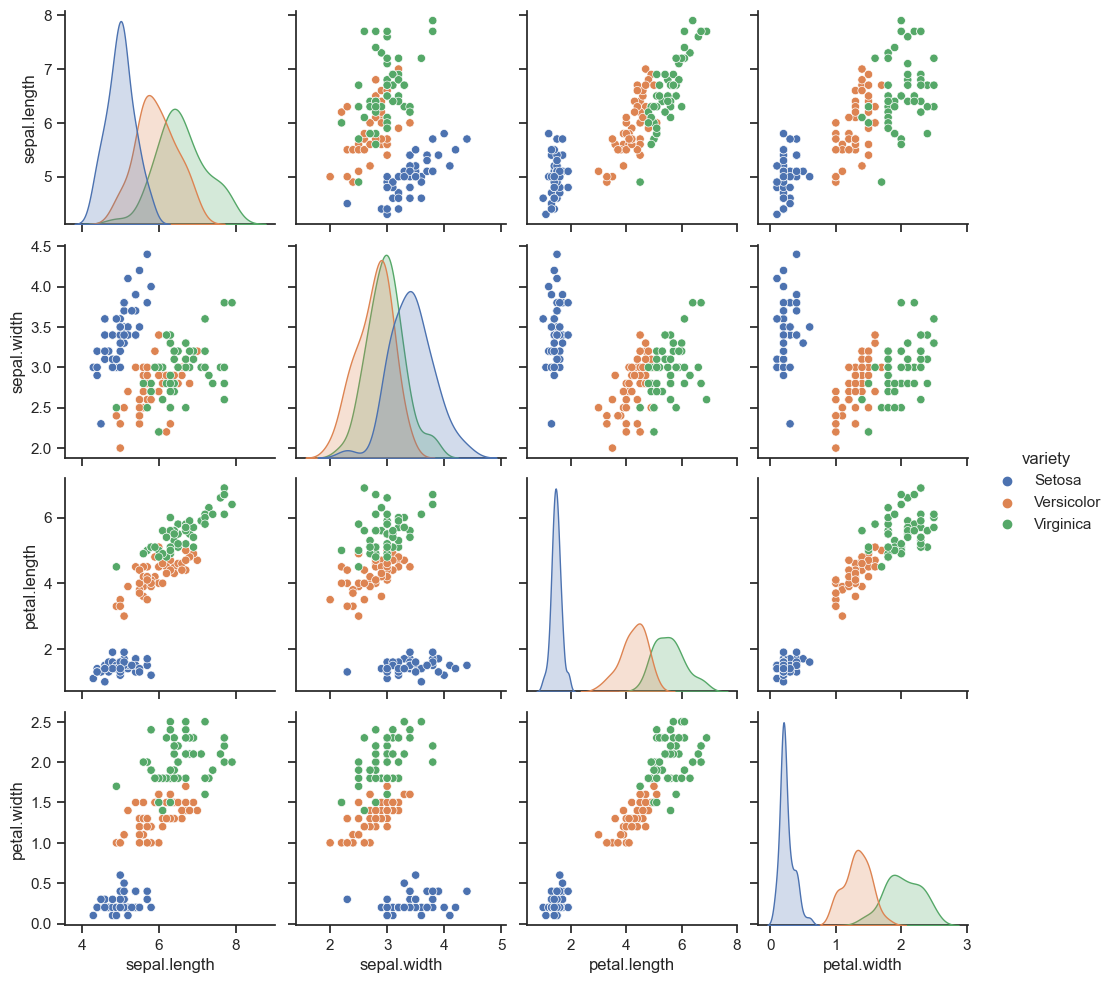

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.pairplot(df, hue="variety")
plt.show()

***

### Task 5

### Principal Component Analysis on the iris data set

In [28]:
# Import pandas
import pandas as pd

# Import scipy
import scipy.stats as ss

# Statistical plots
import seaborn as sns

# Preprocessing.
import sklearn.preprocessing as pre

# Import Decomposition 
import sklearn.decomposition as dec

# Plots.
import matplotlib.pyplot as plt

In [3]:
# Download the iris data set 
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

df = pd.read_csv(url)

df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


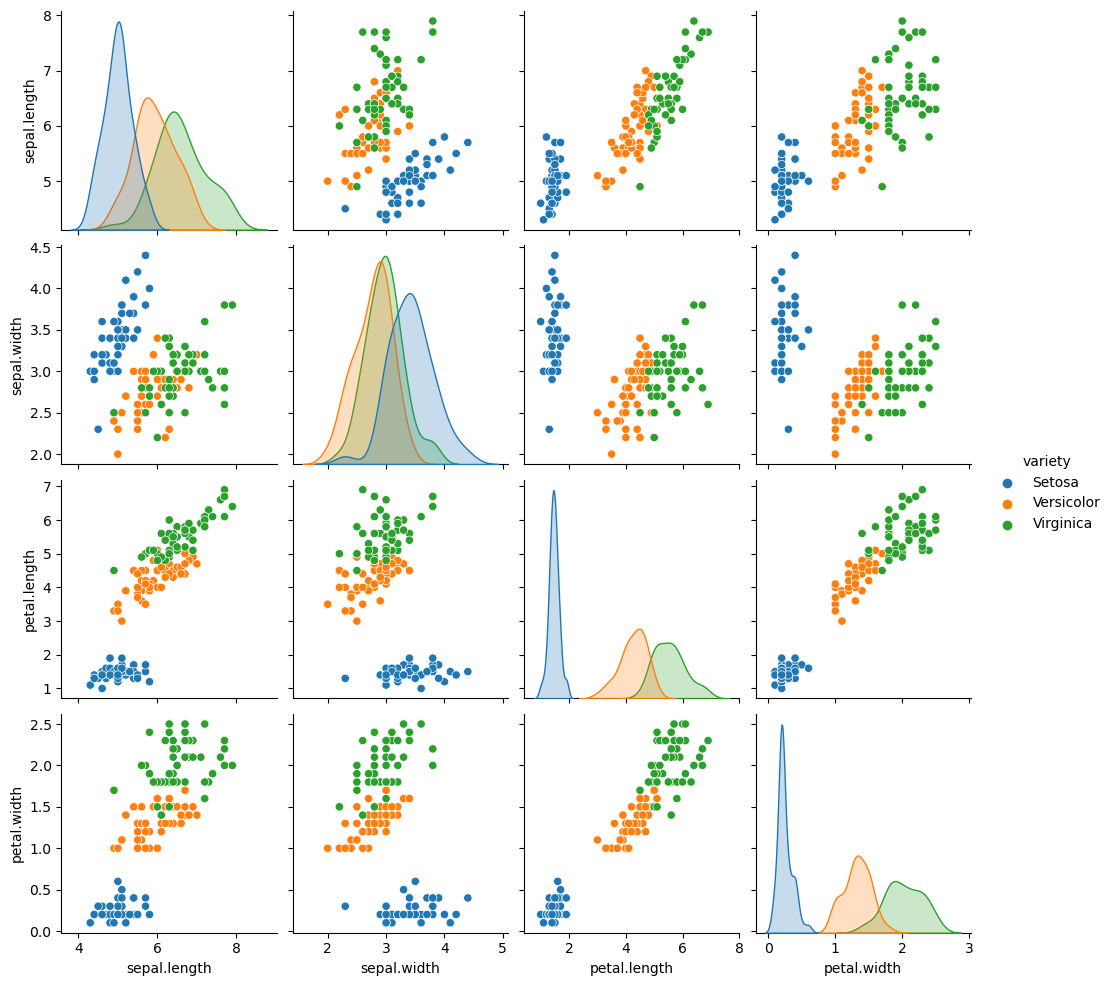

In [13]:
# Scatter plots and histograms.
sns.pairplot(df, hue='variety');

##### Scaling data

In [5]:
# Independent variables.
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

In [7]:
# Create a standard scaler
scaler = pre.StandardScaler()

# Show.
scaler

StandardScaler()

In [8]:
# Fit the data to the scaler
scaler.fit(X)

StandardScaler()

In [9]:
# Describe X
X.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Show the means and variances
scaler.mean_, scaler.var_

(array([5.84333333, 3.05733333, 3.758     , 1.19933333]),
 array([0.68112222, 0.18871289, 3.09550267, 0.57713289]))

In [14]:
# Create a new PCA instance
pca = dec.PCA(n_components=2)

In [15]:
# Fit the data to PCA
pca.fit(X)

PCA(n_components=2)

In [16]:
# Show the variablity
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [25]:
# Transform X.
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

In [21]:
# Original varity
df_pca = pd.DataFrame(df[['variety']])

# Incorporate PCA variables into the df
df_pca['pca0'] = X_pca[:, 0]
df_pca['pca1'] = X_pca[:, 1]

# Show.
print(df_pca.head())

  variety      pca0      pca1
0  Setosa -2.684126  0.319397
1  Setosa -2.714142 -0.177001
2  Setosa -2.888991 -0.144949
3  Setosa -2.745343 -0.318299
4  Setosa -2.728717  0.326755


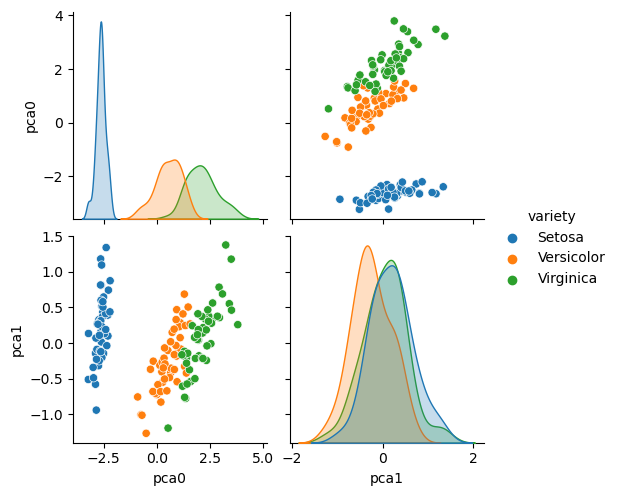

In [23]:
# Pair plot.
sns.pairplot(df_pca, hue='variety')

Analysis and conclusion

Principal component analysis (PCA) applied to the Iris dataset was successful in reducing the dimensionality of the data while still preserving the ability to distinguish between the three species. The above plot shows the distribution of the data in the reduced dimensional space. It shows that the Setosa class is completley separable form other two classess. Also, it can be seen that Versicolor and Vriginica can also be separable with some level of accuracy in this two dimensional space. This suggests that the two principal components captured enough of the variance in the data to distinguish between these distinct species.

Transforming the data to reduce the number of dimensions is useful as the data can be now represented more efficiently while preserving the most important information. This reduced dimensionality can be beneficial if we are planning to emplyoee further analysis on this dataset, such as data visualization, machine learning etc.